## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.8ms	remaining: 52.8s
1:	learn: 0.9301086	total: 57ms	remaining: 28.4s
2:	learn: 0.9005637	total: 60.6ms	remaining: 20.1s
3:	learn: 0.8720983	total: 64.5ms	remaining: 16.1s
4:	learn: 0.8467410	total: 67.9ms	remaining: 13.5s
5:	learn: 0.8226672	total: 71.3ms	remaining: 11.8s
6:	learn: 0.7994702	total: 74.6ms	remaining: 10.6s
7:	learn: 0.7784272	total: 77.9ms	remaining: 9.66s
8:	learn: 0.7602192	total: 81.2ms	remaining: 8.94s
9:	learn: 0.7412421	total: 92.8ms	remaining: 9.18s
10:	learn: 0.7247930	total: 98.3ms	remaining: 8.83s
11:	learn: 0.7089951	total: 102ms	remaining: 8.41s
12:	learn: 0.6951345	total: 106ms	remaining: 8.04s
13:	learn: 0.6809276	total: 109ms	remaining: 7.69s
14:	learn: 0.6692630	total: 113ms	remaining: 7.39s
15:	learn: 0.6588323	total: 116ms	remaining: 7.13s
16:	learn: 0.6472700	total: 119ms	remaining: 6.89s
17:	learn: 0.6379982	total: 123ms	remaining: 6.68s
18:	learn: 0.6294674	total: 126ms	remaining: 6.49s
19

36:	learn: 0.5337228	total: 183ms	remaining: 4.75s
37:	learn: 0.5296892	total: 186ms	remaining: 4.7s
38:	learn: 0.5255485	total: 189ms	remaining: 4.65s
39:	learn: 0.5217941	total: 192ms	remaining: 4.6s
40:	learn: 0.5196440	total: 195ms	remaining: 4.56s
41:	learn: 0.5170220	total: 198ms	remaining: 4.51s
42:	learn: 0.5141148	total: 201ms	remaining: 4.47s
43:	learn: 0.5116444	total: 204ms	remaining: 4.44s
44:	learn: 0.5100547	total: 207ms	remaining: 4.4s
45:	learn: 0.5069096	total: 211ms	remaining: 4.37s
46:	learn: 0.5051685	total: 214ms	remaining: 4.33s
47:	learn: 0.5033968	total: 217ms	remaining: 4.3s
48:	learn: 0.5012433	total: 220ms	remaining: 4.26s
49:	learn: 0.4986132	total: 223ms	remaining: 4.23s
50:	learn: 0.4968022	total: 226ms	remaining: 4.2s
51:	learn: 0.4951632	total: 229ms	remaining: 4.17s
52:	learn: 0.4928924	total: 232ms	remaining: 4.14s
53:	learn: 0.4917272	total: 235ms	remaining: 4.11s
54:	learn: 0.4895079	total: 238ms	remaining: 4.08s
55:	learn: 0.4881884	total: 241ms	re

98:	learn: 0.4503747	total: 372ms	remaining: 3.39s
99:	learn: 0.4494783	total: 375ms	remaining: 3.38s
100:	learn: 0.4487329	total: 378ms	remaining: 3.37s
101:	learn: 0.4481325	total: 382ms	remaining: 3.36s
102:	learn: 0.4475445	total: 385ms	remaining: 3.35s
103:	learn: 0.4466014	total: 388ms	remaining: 3.34s
104:	learn: 0.4461730	total: 391ms	remaining: 3.33s
105:	learn: 0.4457259	total: 394ms	remaining: 3.32s
106:	learn: 0.4451085	total: 397ms	remaining: 3.31s
107:	learn: 0.4447909	total: 400ms	remaining: 3.31s
108:	learn: 0.4440936	total: 404ms	remaining: 3.3s
109:	learn: 0.4435519	total: 407ms	remaining: 3.29s
110:	learn: 0.4431075	total: 410ms	remaining: 3.28s
111:	learn: 0.4425498	total: 413ms	remaining: 3.27s
112:	learn: 0.4419106	total: 417ms	remaining: 3.27s
113:	learn: 0.4414425	total: 420ms	remaining: 3.26s
114:	learn: 0.4407446	total: 423ms	remaining: 3.25s
115:	learn: 0.4402011	total: 426ms	remaining: 3.25s
116:	learn: 0.4398559	total: 429ms	remaining: 3.24s
117:	learn: 0.4

160:	learn: 0.4201256	total: 563ms	remaining: 2.93s
161:	learn: 0.4197073	total: 566ms	remaining: 2.93s
162:	learn: 0.4192052	total: 570ms	remaining: 2.93s
163:	learn: 0.4187949	total: 573ms	remaining: 2.92s
164:	learn: 0.4184572	total: 576ms	remaining: 2.91s
165:	learn: 0.4180680	total: 579ms	remaining: 2.91s
166:	learn: 0.4176884	total: 581ms	remaining: 2.9s
167:	learn: 0.4173026	total: 584ms	remaining: 2.89s
168:	learn: 0.4170486	total: 587ms	remaining: 2.89s
169:	learn: 0.4165960	total: 590ms	remaining: 2.88s
170:	learn: 0.4161870	total: 593ms	remaining: 2.87s
171:	learn: 0.4156228	total: 596ms	remaining: 2.87s
172:	learn: 0.4153041	total: 599ms	remaining: 2.87s
173:	learn: 0.4148857	total: 603ms	remaining: 2.86s
174:	learn: 0.4144190	total: 606ms	remaining: 2.85s
175:	learn: 0.4140875	total: 609ms	remaining: 2.85s
176:	learn: 0.4136755	total: 612ms	remaining: 2.85s
177:	learn: 0.4133860	total: 615ms	remaining: 2.84s
178:	learn: 0.4129780	total: 618ms	remaining: 2.84s
179:	learn: 0

222:	learn: 0.3978579	total: 752ms	remaining: 2.62s
223:	learn: 0.3976462	total: 755ms	remaining: 2.61s
224:	learn: 0.3973704	total: 758ms	remaining: 2.61s
225:	learn: 0.3971729	total: 761ms	remaining: 2.6s
226:	learn: 0.3968841	total: 764ms	remaining: 2.6s
227:	learn: 0.3965787	total: 767ms	remaining: 2.6s
228:	learn: 0.3963073	total: 770ms	remaining: 2.59s
229:	learn: 0.3960925	total: 773ms	remaining: 2.59s
230:	learn: 0.3957018	total: 776ms	remaining: 2.58s
231:	learn: 0.3954162	total: 779ms	remaining: 2.58s
232:	learn: 0.3951665	total: 782ms	remaining: 2.57s
233:	learn: 0.3949269	total: 785ms	remaining: 2.57s
234:	learn: 0.3945894	total: 788ms	remaining: 2.56s
235:	learn: 0.3944181	total: 791ms	remaining: 2.56s
236:	learn: 0.3941497	total: 794ms	remaining: 2.56s
237:	learn: 0.3939819	total: 797ms	remaining: 2.55s
238:	learn: 0.3938322	total: 800ms	remaining: 2.55s
239:	learn: 0.3935463	total: 803ms	remaining: 2.54s
240:	learn: 0.3933166	total: 806ms	remaining: 2.54s
241:	learn: 0.3

285:	learn: 0.3826742	total: 943ms	remaining: 2.35s
286:	learn: 0.3824534	total: 946ms	remaining: 2.35s
287:	learn: 0.3821767	total: 949ms	remaining: 2.35s
288:	learn: 0.3819748	total: 952ms	remaining: 2.34s
289:	learn: 0.3817667	total: 955ms	remaining: 2.34s
290:	learn: 0.3815253	total: 958ms	remaining: 2.33s
291:	learn: 0.3813529	total: 961ms	remaining: 2.33s
292:	learn: 0.3812172	total: 964ms	remaining: 2.33s
293:	learn: 0.3809978	total: 967ms	remaining: 2.32s
294:	learn: 0.3807825	total: 970ms	remaining: 2.32s
295:	learn: 0.3805940	total: 973ms	remaining: 2.31s
296:	learn: 0.3801959	total: 976ms	remaining: 2.31s
297:	learn: 0.3799439	total: 979ms	remaining: 2.31s
298:	learn: 0.3797228	total: 982ms	remaining: 2.3s
299:	learn: 0.3795554	total: 985ms	remaining: 2.3s
300:	learn: 0.3793733	total: 988ms	remaining: 2.29s
301:	learn: 0.3791607	total: 991ms	remaining: 2.29s
302:	learn: 0.3789297	total: 995ms	remaining: 2.29s
303:	learn: 0.3787482	total: 998ms	remaining: 2.28s
304:	learn: 0.

347:	learn: 0.3705958	total: 1.13s	remaining: 2.12s
348:	learn: 0.3703798	total: 1.14s	remaining: 2.12s
349:	learn: 0.3701923	total: 1.14s	remaining: 2.12s
350:	learn: 0.3700067	total: 1.14s	remaining: 2.11s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.11s
352:	learn: 0.3697314	total: 1.15s	remaining: 2.1s
353:	learn: 0.3695617	total: 1.15s	remaining: 2.1s
354:	learn: 0.3694397	total: 1.15s	remaining: 2.1s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.09s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.09s
357:	learn: 0.3689645	total: 1.16s	remaining: 2.09s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.08s
359:	learn: 0.3686485	total: 1.17s	remaining: 2.08s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.08s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.07s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.07s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.07s
364:	learn: 0.3679761	total: 1.19s	remaining: 2.06s
365:	learn: 0.3677932	total: 1.19s	remaining: 2.06s
366:	learn: 0.3

408:	learn: 0.3609621	total: 1.33s	remaining: 1.92s
409:	learn: 0.3608193	total: 1.33s	remaining: 1.91s
410:	learn: 0.3604920	total: 1.33s	remaining: 1.91s
411:	learn: 0.3603038	total: 1.33s	remaining: 1.91s
412:	learn: 0.3602055	total: 1.34s	remaining: 1.9s
413:	learn: 0.3599094	total: 1.34s	remaining: 1.9s
414:	learn: 0.3597887	total: 1.34s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.89s
416:	learn: 0.3594487	total: 1.35s	remaining: 1.89s
417:	learn: 0.3592759	total: 1.35s	remaining: 1.89s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.88s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.88s
420:	learn: 0.3587972	total: 1.36s	remaining: 1.88s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.87s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.87s
423:	learn: 0.3584427	total: 1.37s	remaining: 1.86s
424:	learn: 0.3583044	total: 1.38s	remaining: 1.86s
425:	learn: 0.3581698	total: 1.38s	remaining: 1.86s
426:	learn: 0.3580461	total: 1.38s	remaining: 1.85s
427:	learn: 0.3

468:	learn: 0.3522115	total: 1.52s	remaining: 1.72s
469:	learn: 0.3521029	total: 1.52s	remaining: 1.71s
470:	learn: 0.3519673	total: 1.52s	remaining: 1.71s
471:	learn: 0.3518082	total: 1.53s	remaining: 1.71s
472:	learn: 0.3516593	total: 1.53s	remaining: 1.7s
473:	learn: 0.3514906	total: 1.53s	remaining: 1.7s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.7s
475:	learn: 0.3512406	total: 1.54s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.54s	remaining: 1.69s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.69s
478:	learn: 0.3507270	total: 1.55s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.55s	remaining: 1.68s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.68s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.56s	remaining: 1.67s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.67s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.66s
485:	learn: 0.3497143	total: 1.57s	remaining: 1.66s
486:	learn: 0.3496172	total: 1.57s	remaining: 1.66s
487:	learn: 0.3

529:	learn: 0.3441108	total: 1.71s	remaining: 1.52s
530:	learn: 0.3439546	total: 1.71s	remaining: 1.51s
531:	learn: 0.3438254	total: 1.72s	remaining: 1.51s
532:	learn: 0.3437049	total: 1.72s	remaining: 1.51s
533:	learn: 0.3435053	total: 1.72s	remaining: 1.5s
534:	learn: 0.3433236	total: 1.73s	remaining: 1.5s
535:	learn: 0.3432219	total: 1.73s	remaining: 1.5s
536:	learn: 0.3431615	total: 1.73s	remaining: 1.49s
537:	learn: 0.3430198	total: 1.74s	remaining: 1.49s
538:	learn: 0.3429422	total: 1.74s	remaining: 1.49s
539:	learn: 0.3428024	total: 1.74s	remaining: 1.48s
540:	learn: 0.3426641	total: 1.74s	remaining: 1.48s
541:	learn: 0.3425885	total: 1.75s	remaining: 1.48s
542:	learn: 0.3424695	total: 1.75s	remaining: 1.47s
543:	learn: 0.3423997	total: 1.75s	remaining: 1.47s
544:	learn: 0.3422315	total: 1.76s	remaining: 1.47s
545:	learn: 0.3421242	total: 1.76s	remaining: 1.46s
546:	learn: 0.3419673	total: 1.76s	remaining: 1.46s
547:	learn: 0.3418121	total: 1.77s	remaining: 1.46s
548:	learn: 0.3

591:	learn: 0.3371913	total: 1.9s	remaining: 1.31s
592:	learn: 0.3371272	total: 1.9s	remaining: 1.31s
593:	learn: 0.3370368	total: 1.91s	remaining: 1.3s
594:	learn: 0.3368150	total: 1.91s	remaining: 1.3s
595:	learn: 0.3367491	total: 1.91s	remaining: 1.3s
596:	learn: 0.3366496	total: 1.92s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.92s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.92s	remaining: 1.29s
599:	learn: 0.3363937	total: 1.92s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.93s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.93s	remaining: 1.28s
602:	learn: 0.3360683	total: 1.93s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.94s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.94s	remaining: 1.27s
605:	learn: 0.3358268	total: 1.94s	remaining: 1.26s
606:	learn: 0.3356597	total: 1.95s	remaining: 1.26s
607:	learn: 0.3355448	total: 1.95s	remaining: 1.26s
608:	learn: 0.3354512	total: 1.95s	remaining: 1.25s
609:	learn: 0.3353398	total: 1.96s	remaining: 1.25s
610:	learn: 0.335

653:	learn: 0.3308321	total: 2.09s	remaining: 1.11s
654:	learn: 0.3307342	total: 2.09s	remaining: 1.1s
655:	learn: 0.3306809	total: 2.1s	remaining: 1.1s
656:	learn: 0.3305729	total: 2.1s	remaining: 1.1s
657:	learn: 0.3304900	total: 2.1s	remaining: 1.09s
658:	learn: 0.3303842	total: 2.11s	remaining: 1.09s
659:	learn: 0.3302235	total: 2.11s	remaining: 1.09s
660:	learn: 0.3300983	total: 2.11s	remaining: 1.08s
661:	learn: 0.3299994	total: 2.12s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.12s	remaining: 1.08s
663:	learn: 0.3298189	total: 2.12s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.13s	remaining: 1.07s
665:	learn: 0.3296671	total: 2.13s	remaining: 1.07s
666:	learn: 0.3295999	total: 2.13s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.13s	remaining: 1.06s
668:	learn: 0.3294195	total: 2.14s	remaining: 1.06s
669:	learn: 0.3293185	total: 2.14s	remaining: 1.05s
670:	learn: 0.3292086	total: 2.14s	remaining: 1.05s
671:	learn: 0.3289913	total: 2.15s	remaining: 1.05s
672:	learn: 0.3288

696:	learn: 0.3267980	total: 2.23s	remaining: 967ms
697:	learn: 0.3266887	total: 2.23s	remaining: 964ms
698:	learn: 0.3265888	total: 2.23s	remaining: 961ms
699:	learn: 0.3265229	total: 2.23s	remaining: 958ms
700:	learn: 0.3264350	total: 2.24s	remaining: 954ms
701:	learn: 0.3263223	total: 2.24s	remaining: 951ms
702:	learn: 0.3262539	total: 2.24s	remaining: 948ms
703:	learn: 0.3261258	total: 2.25s	remaining: 945ms
704:	learn: 0.3260520	total: 2.25s	remaining: 941ms
705:	learn: 0.3259475	total: 2.25s	remaining: 938ms
706:	learn: 0.3258911	total: 2.25s	remaining: 934ms
707:	learn: 0.3257903	total: 2.26s	remaining: 931ms
708:	learn: 0.3256952	total: 2.26s	remaining: 928ms
709:	learn: 0.3255982	total: 2.26s	remaining: 925ms
710:	learn: 0.3255301	total: 2.27s	remaining: 921ms
711:	learn: 0.3254442	total: 2.27s	remaining: 918ms
712:	learn: 0.3253361	total: 2.27s	remaining: 915ms
713:	learn: 0.3252431	total: 2.27s	remaining: 912ms
714:	learn: 0.3251186	total: 2.28s	remaining: 908ms
715:	learn: 

759:	learn: 0.3212014	total: 2.41s	remaining: 762ms
760:	learn: 0.3211190	total: 2.42s	remaining: 759ms
761:	learn: 0.3210312	total: 2.42s	remaining: 756ms
762:	learn: 0.3209495	total: 2.42s	remaining: 753ms
763:	learn: 0.3208564	total: 2.42s	remaining: 749ms
764:	learn: 0.3207911	total: 2.43s	remaining: 746ms
765:	learn: 0.3206643	total: 2.43s	remaining: 743ms
766:	learn: 0.3205891	total: 2.43s	remaining: 740ms
767:	learn: 0.3204765	total: 2.44s	remaining: 736ms
768:	learn: 0.3203840	total: 2.44s	remaining: 733ms
769:	learn: 0.3203086	total: 2.44s	remaining: 730ms
770:	learn: 0.3202066	total: 2.45s	remaining: 727ms
771:	learn: 0.3200935	total: 2.45s	remaining: 724ms
772:	learn: 0.3200251	total: 2.45s	remaining: 720ms
773:	learn: 0.3199577	total: 2.46s	remaining: 717ms
774:	learn: 0.3198837	total: 2.46s	remaining: 714ms
775:	learn: 0.3198135	total: 2.46s	remaining: 711ms
776:	learn: 0.3197430	total: 2.46s	remaining: 707ms
777:	learn: 0.3196478	total: 2.47s	remaining: 704ms
778:	learn: 

821:	learn: 0.3159403	total: 2.61s	remaining: 565ms
822:	learn: 0.3158160	total: 2.61s	remaining: 562ms
823:	learn: 0.3157523	total: 2.62s	remaining: 559ms
824:	learn: 0.3156673	total: 2.62s	remaining: 555ms
825:	learn: 0.3156288	total: 2.62s	remaining: 552ms
826:	learn: 0.3155257	total: 2.62s	remaining: 549ms
827:	learn: 0.3154546	total: 2.63s	remaining: 546ms
828:	learn: 0.3153664	total: 2.63s	remaining: 543ms
829:	learn: 0.3152896	total: 2.63s	remaining: 539ms
830:	learn: 0.3152050	total: 2.64s	remaining: 536ms
831:	learn: 0.3151385	total: 2.64s	remaining: 533ms
832:	learn: 0.3150922	total: 2.64s	remaining: 530ms
833:	learn: 0.3149588	total: 2.65s	remaining: 527ms
834:	learn: 0.3149074	total: 2.65s	remaining: 523ms
835:	learn: 0.3148291	total: 2.65s	remaining: 520ms
836:	learn: 0.3147707	total: 2.65s	remaining: 517ms
837:	learn: 0.3147022	total: 2.66s	remaining: 514ms
838:	learn: 0.3145737	total: 2.66s	remaining: 511ms
839:	learn: 0.3144908	total: 2.66s	remaining: 508ms
840:	learn: 

883:	learn: 0.3111915	total: 2.8s	remaining: 367ms
884:	learn: 0.3111075	total: 2.8s	remaining: 364ms
885:	learn: 0.3110486	total: 2.81s	remaining: 361ms
886:	learn: 0.3109334	total: 2.81s	remaining: 358ms
887:	learn: 0.3108347	total: 2.81s	remaining: 355ms
888:	learn: 0.3107647	total: 2.81s	remaining: 351ms
889:	learn: 0.3107302	total: 2.82s	remaining: 348ms
890:	learn: 0.3106509	total: 2.82s	remaining: 345ms
891:	learn: 0.3106139	total: 2.82s	remaining: 342ms
892:	learn: 0.3105421	total: 2.83s	remaining: 339ms
893:	learn: 0.3104659	total: 2.83s	remaining: 336ms
894:	learn: 0.3104028	total: 2.83s	remaining: 332ms
895:	learn: 0.3103186	total: 2.84s	remaining: 329ms
896:	learn: 0.3102488	total: 2.84s	remaining: 326ms
897:	learn: 0.3101565	total: 2.84s	remaining: 323ms
898:	learn: 0.3100955	total: 2.85s	remaining: 320ms
899:	learn: 0.3100512	total: 2.85s	remaining: 317ms
900:	learn: 0.3100138	total: 2.85s	remaining: 313ms
901:	learn: 0.3099635	total: 2.85s	remaining: 310ms
902:	learn: 0.

944:	learn: 0.3068968	total: 2.99s	remaining: 174ms
945:	learn: 0.3068564	total: 2.99s	remaining: 171ms
946:	learn: 0.3067279	total: 2.99s	remaining: 167ms
947:	learn: 0.3066517	total: 3s	remaining: 164ms
948:	learn: 0.3066014	total: 3s	remaining: 161ms
949:	learn: 0.3065250	total: 3s	remaining: 158ms
950:	learn: 0.3064465	total: 3s	remaining: 155ms
951:	learn: 0.3063837	total: 3.01s	remaining: 152ms
952:	learn: 0.3063292	total: 3.01s	remaining: 149ms
953:	learn: 0.3062107	total: 3.01s	remaining: 145ms
954:	learn: 0.3061348	total: 3.02s	remaining: 142ms
955:	learn: 0.3060576	total: 3.02s	remaining: 139ms
956:	learn: 0.3059772	total: 3.02s	remaining: 136ms
957:	learn: 0.3058989	total: 3.03s	remaining: 133ms
958:	learn: 0.3057985	total: 3.03s	remaining: 130ms
959:	learn: 0.3056692	total: 3.03s	remaining: 126ms
960:	learn: 0.3055777	total: 3.04s	remaining: 123ms
961:	learn: 0.3054462	total: 3.04s	remaining: 120ms
962:	learn: 0.3053516	total: 3.04s	remaining: 117ms
963:	learn: 0.3052664	to

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09883937981544794


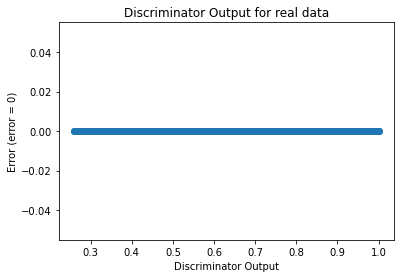

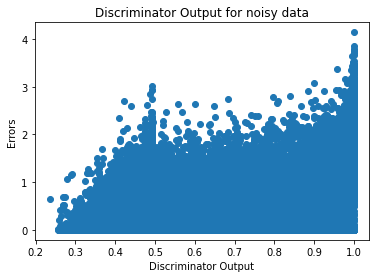

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
